<div style='
    background-color:black;
    color:white;
    border-radius:10px; 
    padding:10px;
    '>
    <h1 style='
     color:yellow;
     text-decoration:underline;
     font-weight:bold;
     font-style:italic;
    '>Multivarient Linear Regression Using Vectors</h1>
    <ul>
        <li>Name: <b>Zohaib Khan</b></li>
        <li>Class Number: <b>BSCS-221335</b></li>
        <li>Section: <b>A</b></li>
        <li>Subject: <b>Computer Science</b></li>
        <li>Course: <b>Artificial Intelligence</b></li>
        <li>Professor: <b>Dr Muhammad Sajad</b></li>
        <li>Semester: <b>6th</b></li>
        <li>Assignment: <b> 02 ( Part-I )</b></li>
        <li><b><i>ISLAMIA COLLEGE PESHAWER</i></b></li>
    </ul>
</div>
<h2>Credit Card Spending Dataset Details</h2>
<p>This dataset contains 100 examples and includes 4 features along with a target variable. It is designed to demonstrate the problem of regularization due to multicollinearity among features.</p>

<h3>Features:</h3>
<table>
    <tr><th>Feature</th><th>Description</th></tr>
    <tr><td>Age</td><td>Age of the credit card holder (18 to 65 years).</td></tr>
    <tr><td>Annual_Income</td><td>Annual income of the cardholder (in USD), correlated with age.</td></tr>
    <tr><td>Credit_Score</td><td>Credit score of the cardholder (range: 300-850).</td></tr>
    <tr><td>Late_Payments</td><td>Number of late payments made by the cardholder (0 to 4).</td></tr>
    <tr><td>Credit_Card_Spending (Target)</td><td>Total credit card spending, calculated as a linear combination of the features plus noise.</td></tr>
</table>

<h3>Regularization Problem:</h3>
<p>The main issue with this dataset is multicollinearity between <strong>Age</strong> and <strong>Annual_Income</strong>. The linear relationship between these features can cause overfitting when using simple linear regression. Regularization techniques like Ridge or Lasso regression are necessary to stabilize the model.</p>
<p>If lambda (regularization parameter) is too low, the model may overfit by assigning high weights to correlated features. If it is too high, the model may underfit by ignoring relevant information.</p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Data-Files/credit__card_spending_dataset.csv")
dataset

,Age,Annual_Income,Credit_Score,Late_Payments,Credit_Card_Spending
0,19,68492,350,4,2082.253611
1,32,55687,328,1,1678.693829
2,28,74727,761,1,2251.319568
3,25,49018,595,0,1427.084254
4,43,74302,596,4,2257.448013
...,...,...,...,...,...
95,34,81632,790,3,2454.757512
96,50,78795,751,0,2414.613643
97,64,95641,799,2,2956.939098
98,19,61408,464,2,1852.567263


In [3]:
def hypothesis(theta, X):
    return np.dot(X, theta)

def compute_cost(theta, X, y):
    m = len(y)
    predictions = hypothesis(theta, X)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    predictions = hypothesis(theta, X)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    return gradient

def scaled_feature(feature):
    max_value = max(feature)
    feature = [x/max_value for x in feature]
    return feature

(1/2m ) x errors<sup>T</sup> x error <br>
(1/m ) x X<sup>T</sup> x error

In [4]:
age = dataset["Age"].tolist()
anual_income = dataset["Annual_Income"].tolist()
credit_score = dataset["Credit_Score"].tolist()
late_payments = dataset["Late_Payments"].tolist()
credit_card_spending = dataset["Credit_Card_Spending"].tolist()

In [5]:
x1 = np.array(scaled_feature(age)).reshape(-1,1)
x2 = np.array(scaled_feature(anual_income)).reshape(-1,1)
x3 = np.array(scaled_feature(credit_score)).reshape(-1,1)
x4 = np.array(scaled_feature(late_payments)).reshape(-1,1)
y = np.array(credit_card_spending).reshape(-1,1)

In [6]:
x = np.column_stack((np.ones(100),x1,x2,x3,x4))
print(f"Shape of X Matrix : {x.shape}")
print(f"Size of X Matrix : {x.size}")
print(x)

Shape of X Matrix : (100, 5)
Size of X Matrix : 500
[[1.         0.296875   0.66184798 0.41866029 1.        ]
 [1.         0.5        0.53811144 0.3923445  0.25      ]
 [1.         0.4375     0.72209768 0.91028708 0.25      ]
 [1.         0.390625   0.47366794 0.71172249 0.        ]
 [1.         0.671875   0.71799084 0.71291866 1.        ]
 [1.         0.96875    0.8114141  0.84449761 0.5       ]
 [1.         0.953125   0.86377868 0.84210526 1.        ]
 [1.         0.34375    0.61988095 0.7715311  0.5       ]
 [1.         0.359375   0.67837195 0.86004785 0.75      ]
 [1.         0.671875   0.77871403 0.57535885 1.        ]
 [1.         0.328125   0.63311946 0.35885167 0.75      ]
 [1.         0.5625     0.75325165 0.80143541 0.25      ]
 [1.         0.578125   0.78320739 0.87320574 0.25      ]
 [1.         0.78125    0.82498116 0.72727273 0.        ]
 [1.         0.578125   0.76460584 0.5215311  1.        ]
 [1.         0.453125   0.52942427 0.5992823  0.75      ]
 [1.         1.     

In [7]:
def train_model(w,x,y,iters,lr):
    epochs = []
    costs = []
    for i in range(iters):
        epochs.append(i)
        cost = compute_cost(w,x,y)
        costs.append(cost[0][0])
        gradient = compute_gradient(w, x, y)
        w -= lr * gradient
    return epochs,costs    

In [8]:
# Cost at learning rate 0.0001
w = np.zeros((5,1))

e_0_0001,c_0_0001 = train_model(w,x,y,250,0.0001)
# Cost at learning rate 0.001
w = np.zeros((5,1))
e_0_001,c_0_001 = train_model(w,x,y,250,0.001)
# Cost at learning rate 0.01
w = np.zeros((5,1))
e_0_01,c_0_01 = train_model(w,x,y,250,0.01)

In [9]:
import matplotlib.pyplot as plt

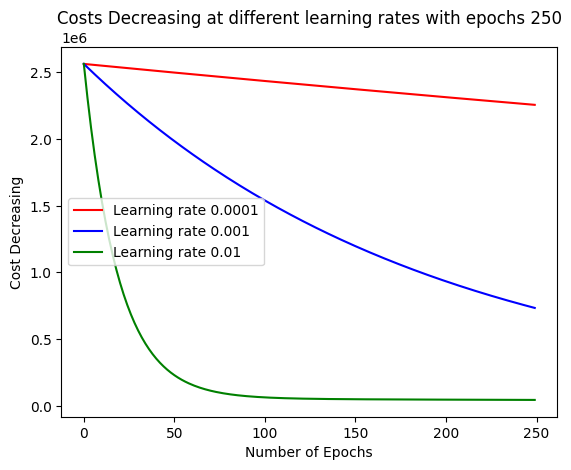

In [10]:
plt.plot(e_0_0001,c_0_0001,c='r',label='Learning rate 0.0001')
plt.plot(e_0_001,c_0_001,c='b',label='Learning rate 0.001')
plt.plot(e_0_01,c_0_01,c='g',label='Learning rate 0.01')
plt.title("Costs Decreasing at different learning rates with epochs 250")
plt.xlabel("Number of Epochs")
plt.ylabel("Cost Decreasing")
plt.legend()
plt.show()

In [11]:
# Cost at learning rate 0.0001
w = np.zeros((5,1))
e_0_0001,c_0_0001 = train_model(w,x,y,500,0.0001)
# Cost at learning rate 0.001
w = np.zeros((5,1))
e_0_001,c_0_001 = train_model(w,x,y,500,0.001)
# Cost at learning rate 0.01
w = np.zeros((5,1))
e_0_01,c_0_01 = train_model(w,x,y,500,0.01)

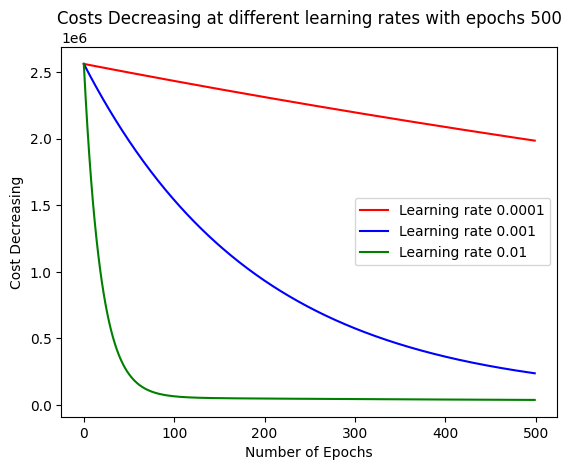

In [12]:
plt.plot(e_0_0001,c_0_0001,c='r',label='Learning rate 0.0001')
plt.plot(e_0_001,c_0_001,c='b',label='Learning rate 0.001')
plt.plot(e_0_01,c_0_01,c='g',label='Learning rate 0.01')
plt.title("Costs Decreasing at different learning rates with epochs 500")
plt.xlabel("Number of Epochs")
plt.ylabel("Cost Decreasing")
plt.legend()
plt.show()

In [13]:
hypothesis(w,x[0])

array([1981.01974777])

In [14]:
hypothesis(w,x[1])

array([1821.60974686])

In [15]:
print(f"Final Weights without solving regularization problem in the dataset:\n{w}")

Final Weights without solving regularization problem in the dataset:
[[822.73840112]
 [680.01749243]
 [773.60889887]
 [457.02742701]
 [253.0504332 ]]


<h2>Implementation with Normal Equation</h2>

In [16]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [17]:
w = np.zeros((5,1))
w = normal_equation(x,y)

In [18]:
print(f"Weights Using Normal Equation \n{w}")

Weights Using Normal Equation 
[[-3.20573710e+00]
 [ 8.00141273e+01]
 [ 3.04215788e+03]
 [-6.40827939e-02]
 [ 2.26423913e+01]]


In [19]:
hypothesis(w,x[0])

array([2056.61006596])

In [20]:
hypothesis(w,x[1])

array([1679.45672576])

<h1>Implementation With Regularization</h1>
<h3 style="font-family: Arial, sans-serif;">Equations Used:</h3>

<h4 style="font-family: Arial, sans-serif;">1. Hypothesis Function:</h4>
<p style="font-family: Arial, sans-serif;">The hypothesis function for linear regression is:</p>
<p style="text-align: center; font-size: 20px; font-family: Georgia, serif;">
    <strong>h(&theta;) = X &middot; &theta;</strong>
</p>

<h4 style="font-family: Arial, sans-serif;">2. Regularized Cost Function:</h4>
<p style="font-family: Arial, sans-serif;">The cost function with L2 regularization (Ridge) is given by:</p>
<p style="text-align: center; font-size: 20px; font-family: Georgia, serif;">
    <strong>J(&theta;) = (1 / 2m) &Sigma; [h(&theta;) - y]^2 + (&#955; / 2m) &Sigma; &theta;<sub>j</sub><sup>2</sup></strong>
</p>
<p style="font-family: Arial, sans-serif;">Where:</p>
<ul style="font-family: Arial, sans-serif;">
    <li><strong>m:</strong> Number of training examples</li>
    <li><strong>&lambda;:</strong> Regularization parameter</li>
    <li><strong>&theta;:</strong> Parameters/weights</li>
</ul>

<h4 style="font-family: Arial, sans-serif;">3. Regularized Gradient Descent:</h4>
<p style="font-family: Arial, sans-serif;">The gradient of the cost function with regularization is:</p>
<p style="text-align: center; font-size: 20px; font-family: Georgia, serif;">
    <strong>&theta;<sub>j</sub> = &theta;<sub>j</sub> - &alpha; [ (1/m) &Sigma; (h(&theta;) - y) &middot; x<sub>j</sub> + (&lambda; / m) &middot; &theta;<sub>j</sub> ]</strong>
</p>
<p style="font-family: Arial, sans-serif;">Where:</p>
<ul style="font-family: Arial, sans-serif;">
    <li><strong>&alpha;:</strong> Learning rate</li>
    <li>The regularization term <strong>(&lambda; / m) &middot; &theta;<sub>j</sub></strong> is added only for <strong>&theta;<sub>1</sub></strong> onwards (not the bias term <strong>&theta;<sub>0</sub></strong>).</li>
</ul>

In [21]:
def compute_cost(theta, x, y, lambda_):
    m = len(y)
    predictions = hypothesis(theta, x)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:])) 
    total_cost = cost + reg_term
    return total_cost

def compute_gradient(theta, x, y, lambda_):
    m = len(y)
    predictions = hypothesis(theta, x)
    errors = predictions - y
    gradient = (1 / m) * np.dot(x.T, errors)
    gradient[1:] += (lambda_ / m) * theta[1:]
    return gradient

In [22]:
def train_model(w,x,y,iters,lr,lmbda):
    epochs = []
    costs = []
    for i in range(iters):
        epochs.append(i)
        cost = compute_cost(w,x,y,lmbda)
        costs.append(cost[0][0])
        gradient = compute_gradient(w, x, y,lmbda)
        w -= lr * gradient
    return epochs,costs  

In [23]:
w = np.zeros((5,1))
e50,c50 = train_model(w,x,y,500,0.01,50)
w

array([[1511.06682898],
       [ 296.78126827],
       [ 319.68869522],
       [ 193.03594154],
       [ 130.95596952]])

In [24]:
w = np.zeros((5,1))
e80,c80 = train_model(w,x,y,500,0.01,80)
w

array([[1710.96383875],
       [ 199.77898114],
       [ 209.82179774],
       [ 122.93691358],
       [  88.87764931]])

In [25]:
w = np.zeros((5,1))
e100,c100 = train_model(w,x,y,500,0.01,100)
w

array([[1800.75596717],
       [ 158.86911002],
       [ 164.41067063],
       [  93.42275324],
       [  69.73842082]])

In [26]:
w = np.zeros((5,1))
e110,c110 = train_model(w,x,y,500,0.01,110)
w

array([[1836.78044098],
       [ 142.97474419],
       [ 146.95001015],
       [  82.04851505],
       [  62.11417837]])

In [27]:
w = np.zeros((5,1))
e120,c120 = train_model(w,x,y,500,0.01,120)
w

array([[1868.15134188],
       [ 129.3910102 ],
       [ 132.11992712],
       [  72.40132759],
       [  55.5316893 ]])

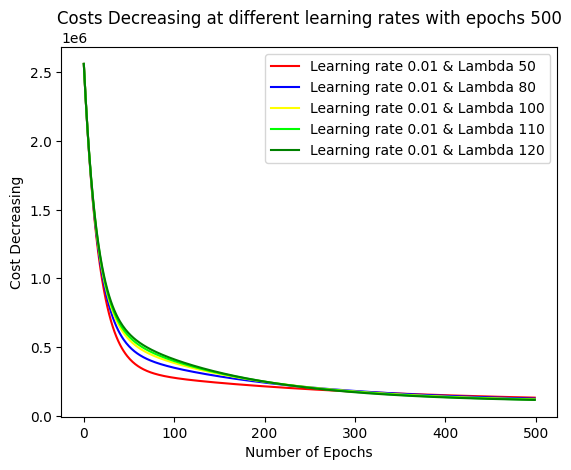

In [28]:
plt.plot(e50,c50,c='r',label='Learning rate 0.01 & Lambda 50')
plt.plot(e80,c80,c='b',label='Learning rate 0.01 & Lambda 80')
plt.plot(e100,c100,c='yellow',label='Learning rate 0.01 & Lambda 100')
plt.plot(e110,c110,c='lime',label='Learning rate 0.01 & Lambda 110')
plt.plot(e120,c120,c='g',label='Learning rate 0.01 & Lambda 120')
plt.title("Costs Decreasing at different learning rates with epochs 500")
plt.xlabel("Number of Epochs")
plt.ylabel("Cost Decreasing")
plt.legend()
plt.show()

In [29]:
hypothesis(w,x[0])

array([2079.85085474])